# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
data.shape

(5391, 6)

In [18]:
data.isna().values.any()

False

In [6]:
data.isnull().values.sum()

0

In [7]:
data[data.duplicated()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [10]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [11]:
data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace('$',"")
data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace(',',"")

data.USD_Production_Budget = pd.to_numeric(data.USD_Production_Budget)

<ipython-input-11-201d45f29de4>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace('$',"")


In [14]:
data.USD_Domestic_Gross = data.USD_Domestic_Gross.astype(str).str.replace('$',"")
data.USD_Domestic_Gross = data.USD_Domestic_Gross.astype(str).str.replace(',',"")

data.USD_Domestic_Gross = pd.to_numeric(data.USD_Domestic_Gross)

<ipython-input-14-590e1ceeb8b5>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.USD_Domestic_Gross = data.USD_Domestic_Gross.astype(str).str.replace('$',"")


In [15]:
data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.astype(str).str.replace('$',"")
data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.astype(str).str.replace(',',"")

data.USD_Worldwide_Gross = pd.to_numeric(data.USD_Worldwide_Gross)

<ipython-input-15-1c2c087f5341>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.astype(str).str.replace('$',"")


In [17]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [ ]:
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']
 
for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        data[col] = data[col].astype(str).str.replace(char, "")
    # Convert column to a numeric data type
    data[col] = pd.to_numeric(data[col])

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [19]:
data.Release_Date = pd.to_datetime(data.Release_Date)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set? **31,113,737.58**

2. What is the average worldwide gross revenue of films? **88,855,421.96**

3. What were the minimums for worldwide and domestic revenue? **$0** 

4. Are the bottom 25% of films actually profitable or do they lose money? **looks like they lose money**

5. What are the highest production budget and highest worldwide gross revenue of any film? 
  **budget: 425,000,000.00**
  **worldwide revenue: 2,783,918,982.00** 
6. How much revenue did the lowest and highest budget films make?
*   **lowest budget: My Date With Drew, $1100, rev: $181,041**
*   **highest budget: Avatar,	$425,000,000, rev: $2,783,918,982.00**


In [21]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [22]:
data.sort_values("USD_Production_Budget", ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225
2911,3,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,963420425,309420425
4925,4,2015-06-11,Spectre,300000000,879620923,200074175
4333,6,2013-02-07,The Lone Ranger,275000000,260002115,89302115
...,...,...,...,...,...,...
1209,5387,1999-02-04,Following,6000,240495,48482
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0
2462,5388,2005-07-13,Return to the Land of Wonders,5000,1338,1338
5007,5390,2015-09-29,A Plague So Pleasant,1400,0,0


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? (512) <br>
What were the highest budget films that grossed nothing?
**Singularity, Aquaman, A Wrinkle in Time**

In [24]:
zero_rev = data[data.USD_Domestic_Gross == 0]

In [25]:
zero_rev.sort_values("USD_Production_Budget", ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


**Challenge**: How many films grossed $0 worldwide? (357) <br>
What are the highest budget films that had no revenue internationally? 
**Singularity, Aquaman, A Wrinkle in Time**

In [26]:
zero_worldwide_rev = data[data.USD_Worldwide_Gross == 0]

In [27]:
zero_worldwide_rev.sort_values("USD_Production_Budget", ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

In [28]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & 
                                  (data.USD_Worldwide_Gross != 0)]

In [29]:
international_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [32]:
int_releases = data.query("USD_Worldwide_Gross != 0 and USD_Domestic_Gross == 0")

In [33]:
int_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? **7** <br> 
* Create another DataFrame called data_clean that does not include these films. 

In [35]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [36]:
unreleased_films = data[data.Release_Date > scrape_date]

In [39]:
unreleased_films

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [42]:
data_clean = data[data.Release_Date < scrape_date]

In [44]:
data_clean = data.drop(unreleased_films.index)

In [45]:
data_clean.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,384.00","5,384.00","5,384.00","5,384.00"
mean,"2,698.11","31,038,476.84","88,970,947.21","41,289,131.75"
std,"1,555.79","40,440,041.47","168,536,755.89","66,055,507.64"
min,1.00,"1,100.00",0.00,0.00
25%,"1,351.75","5,000,000.00","3,929,036.00","1,354,765.25"
50%,"2,698.50","17,000,000.00","27,537,329.00","17,221,932.00"
75%,"4,045.25","40,000,000.00","96,641,996.25","52,403,530.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [51]:
profit = data_clean.USD_Worldwide_Gross.subtract(data_clean.USD_Production_Budget)

In [55]:
data_clean = data_clean.drop("Profit", axis=1)

In [56]:
data_clean.insert(4, "Profit", profit)

In [58]:
data_clean.sort_values("Profit")

,Rank,Release_Date,Movie_Title,USD_Production_Budget,Profit,USD_Worldwide_Gross,USD_Domestic_Gross
5366,79,2017-07-21,Valerian and the City of a Thousand Planets,180000000,-127426868,52573132,31023132
4028,170,2011-11-03,Mars Needs Moms,150000000,-110450242,39549758,21392758
1608,317,2001-04-27,Town & Country,105000000,-94635231,10364769,6712451
1860,364,2002-08-16,The Adventures of Pluto Nash,100000000,-92905005,7094995,4411102
5341,432,2017-04-21,The Promise,90000000,-79979111,10020889,8224288
...,...,...,...,...,...,...,...
4844,59,2015-03-04,Furious 7,190000000,1326748684,1516748684,351032910
5077,28,2015-12-06,Jurassic World,215000000,1456640593,1671640593,652198010
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,1752662225,2058662225,936662225
1034,37,1997-12-19,Titanic,200000000,2007615668,2207615668,658672302


In [59]:
costs_exceed_rev = data_clean[data_clean.Profit < 0]

In [60]:
costs_exceed_rev

,Rank,Release_Date,Movie_Title,USD_Production_Budget,Profit,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,-385907,0,0
6,4630,1927-12-08,Wings,2000000,-2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,-4000000,0,0
15,4738,1936-05-02,Modern Times,1500000,-1334951,165049,163245
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,-1200000,0,0
...,...,...,...,...,...,...,...
5371,4901,2017-07-28,An Inconvenient Sequel,1000000,-869126,130874,130874
5373,2161,2017-08-25,Tulip Fever,25000000,-25000000,0,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,-3963370,36630,0
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,-34987392,140012608,39175066


In [61]:
percent_unprofitable = 2007/5384 * 100
percent_unprofitable

37.27711738484398

In [ ]:
money_losing = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
money_losing.shape[0]/data_clean.shape[0]

# Seaborn for Data Viz: Bubble Charts

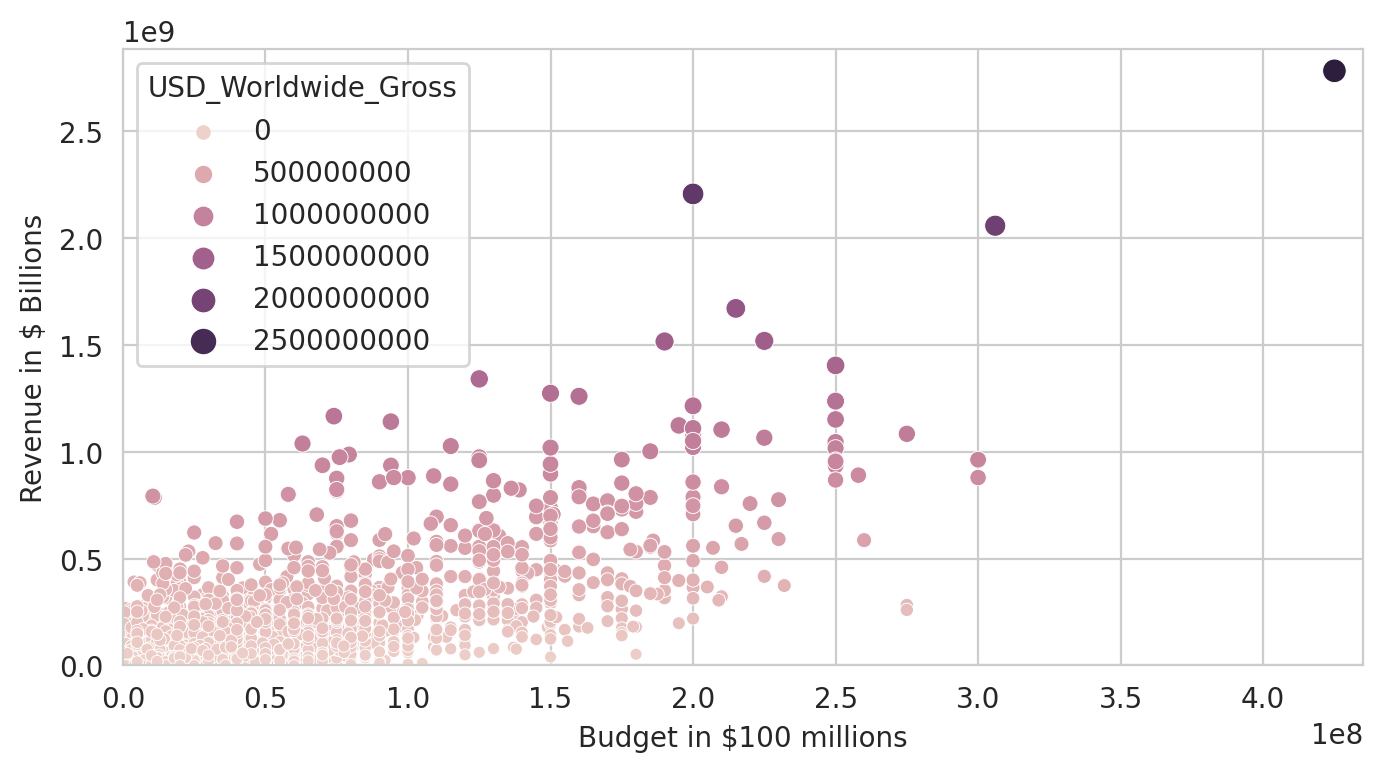

In [78]:
plt.figure(figsize=(8,4), dpi=200)

#set styling on a single chart
with sns.axes_style("whitegrid"):
  ax = sns.scatterplot(data=data_clean, x="USD_Production_Budget", y="USD_Worldwide_Gross",
                      hue="USD_Worldwide_Gross",
                      size="USD_Worldwide_Gross")
  ymax = data_clean.USD_Worldwide_Gross.max()+100000000
  xmax = data_clean.USD_Production_Budget.max()+10000000
  ax.set(ylim=(0,ymax),
        xlim=(0, xmax ), 
        xlabel="Budget in $100 millions",
        ylabel="Revenue in $ Billions")
  plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



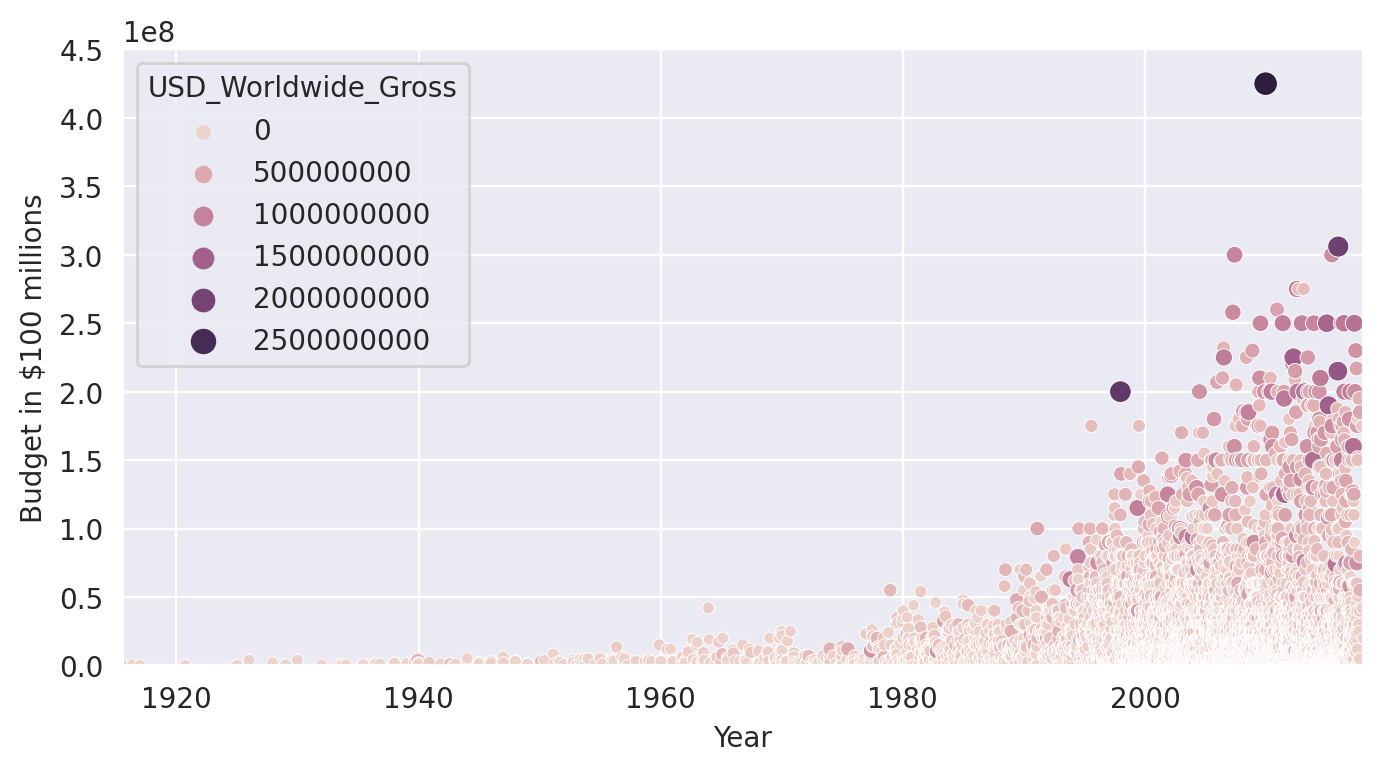

In [82]:
plt.figure(figsize=(8,4), dpi=200)

#set styling on a single chart
with sns.axes_style("darkgrid"):
  ax = sns.scatterplot(data=data_clean, x="Release_Date", y="USD_Production_Budget",
                      hue="USD_Worldwide_Gross",
                      size="USD_Worldwide_Gross")
  xmin = data_clean.Release_Date.min()
  xmax = data_clean.Release_Date.max()
  ax.set(ylim=(0,450000000),
         xlim=(xmin, xmax ), 
        xlabel="Year",
        ylabel="Budget in $100 millions")
  plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [93]:
import numpy as np

In [96]:
years = pd.DatetimeIndex(data_clean["Release_Date"]).year

In [99]:
decades = [int(np.floor(year/10) * 10) for year in years]

In [ ]:
decades = years//10*10

In [100]:
data_clean.insert(2, "Decade", decades)

In [106]:
data_clean.groupby("Decade").count()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,Profit,USD_Worldwide_Gross,USD_Domestic_Gross
Decade,,,,,,,
1910,3,3,3,3,3,3,3
1920,5,5,5,5,5,5,5
1930,16,16,16,16,16,16,16
1940,22,22,22,22,22,22,22
1950,39,39,39,39,39,39,39
1960,68,68,68,68,68,68,68
1970,109,109,109,109,109,109,109
1980,294,294,294,294,294,294,294
1990,817,817,817,817,817,817,817


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970? **153**
* What was the most expensive film made prior to 1970? **Cleopatra**

In [116]:
old_films = data_clean[data_clean.Decade < 1970]
old_films.sort_values("USD_Production_Budget", ascending=False).head()

,Rank,Release_Date,Decade,Movie_Title,USD_Production_Budget,Profit,USD_Worldwide_Gross,USD_Domestic_Gross
109,1253,1963-12-06,1960,Cleopatra,42000000,29000000,71000000,57000000
150,2175,1969-12-16,1960,"Hello, Dolly",24000000,9208099,33208099,33208099
143,2465,1969-01-01,1960,Sweet Charity,20000000,-12000000,8000000,8000000
118,2425,1965-02-15,1960,The Greatest Story Ever Told,20000000,-4526667,15473333,15473333
148,2375,1969-10-15,1960,Paint Your Wagon,20000000,11678778,31678778,31678778


In [113]:
new_films = data_clean[data_clean.Decade >= 1970]
new_films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5231 entries, 153 to 5383
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5231 non-null   int64         
 1   Release_Date           5231 non-null   datetime64[ns]
 2   Decade                 5231 non-null   int64         
 3   Movie_Title            5231 non-null   object        
 4   USD_Production_Budget  5231 non-null   int64         
 5   Profit                 5231 non-null   int64         
 6   USD_Worldwide_Gross    5231 non-null   int64         
 7   USD_Domestic_Gross     5231 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 367.8+ KB


# Seaborn Regression Plots

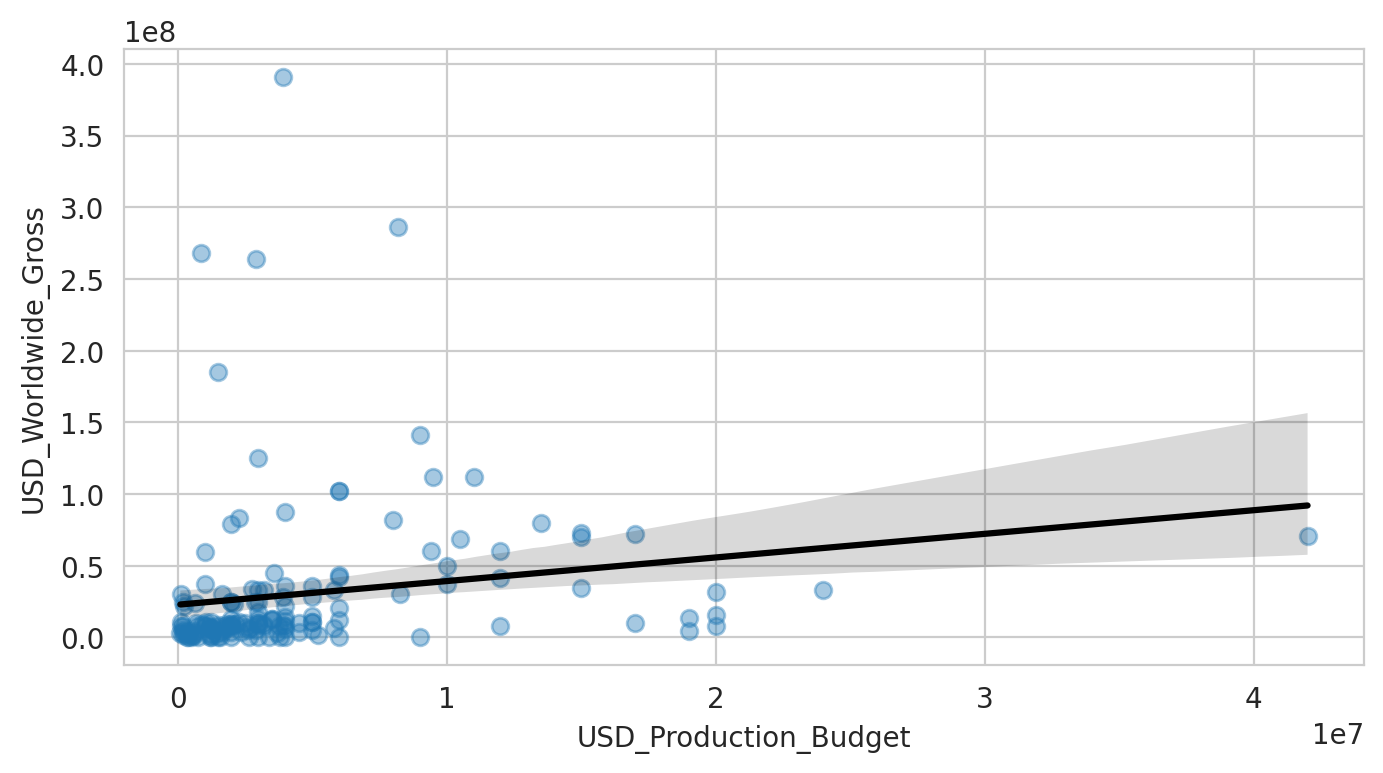

In [118]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})


**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films? **better alignment**
* Roughly how much would a film with a budget of $150 million make according to the regression line? **500 million**

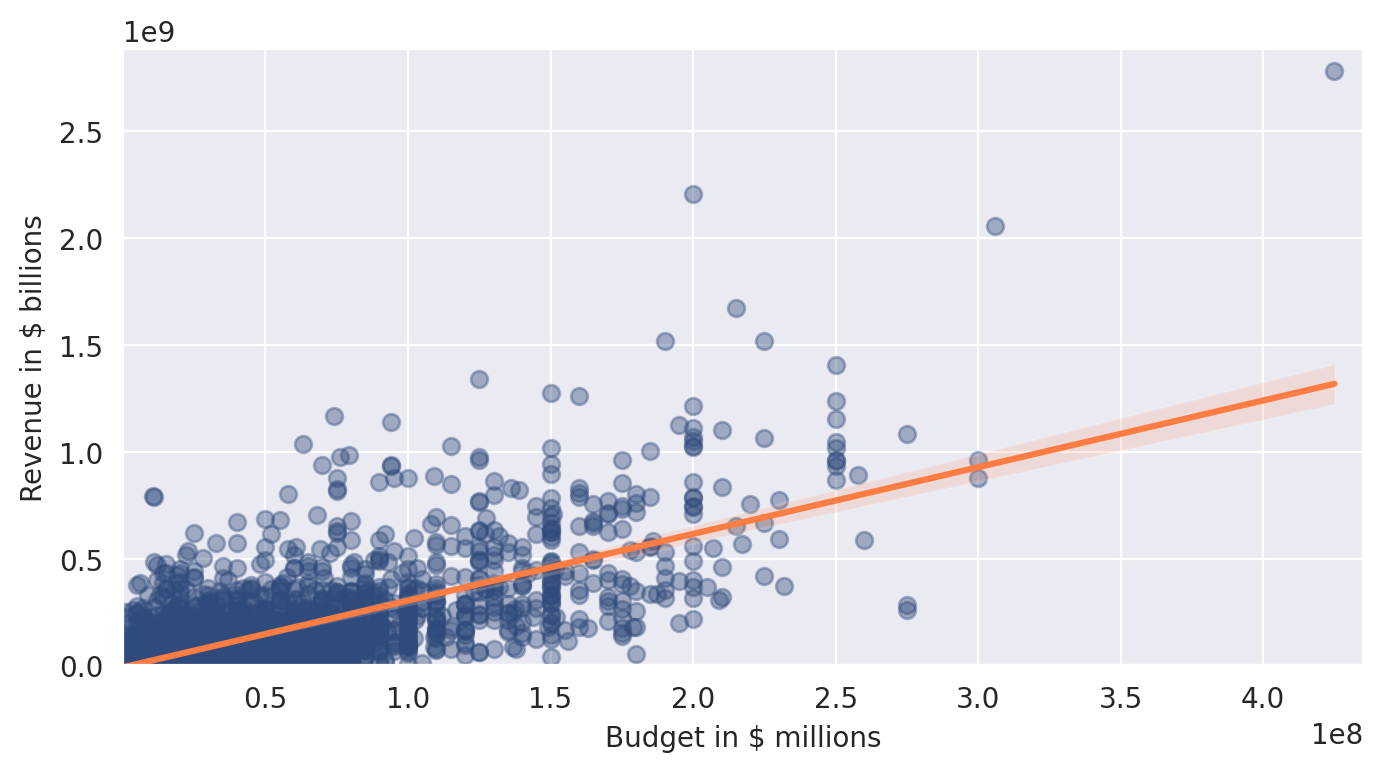

In [127]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  ax = sns.regplot(data=new_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {"color":"#2f4b7c",'alpha': 0.4},
            line_kws = {'color': '#ff7c43'})
  ymax = new_films.USD_Worldwide_Gross.max() + 100000000
  xmax = new_films.USD_Production_Budget.max() + 10000000
  ax.set(ylim=(new_films.USD_Worldwide_Gross.min(),ymax),
         xlim=(new_films.USD_Production_Budget.min(), xmax), 
        ylabel="Revenue in $ billions",
        xlabel="Budget in $ millions")
  plt.show()

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [129]:
regression = LinearRegression()

In [130]:
# explanatory variables (i.e., features)
X = pd.DataFrame(new_films, columns=["USD_Production_Budget"])

# response variable or target
y = pd.DataFrame(new_films, columns=["USD_Worldwide_Gross"])


In [131]:
regression.fit(X,y)

LinearRegression()

In [132]:
regression.intercept_

array([-8650768.00661027])

In [133]:
regression.coef_

array([[3.12259592]])

In [134]:
# R squared (goodness of fit)
regression.score(X,y)

0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [135]:
regression2 = LinearRegression()
# explanatory variables (i.e., features)
X = pd.DataFrame(old_films, columns=["USD_Production_Budget"])

# response variable or target
y = pd.DataFrame(old_films, columns=["USD_Worldwide_Gross"])
regression2.fit(X,y)

LinearRegression()

In [138]:
regression2.score(X,y)*100

2.937258620576877

In [148]:
intercept = regression2.intercept_
intercept

array([22821538.63508039])

In [147]:
slope = regression2.coef_
slope

array([[1.64771314]])

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [145]:
revenue_new = -8650768.00661027 + (3.12259592*350000000)
revenue_new

1084257803.9933898

In [150]:
revenue_old = intercept[0] + slope[0,0]*350000000
revenue_old

599521139.0388364

In [152]:
budget = 350000000
revenue_estimate = regression2.intercept_[0] + regression2.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
